<a href="https://colab.research.google.com/github/MarthaNH/Data-Science/blob/main/TareaPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('/content/GCB2022v27_MtCO2_flat.csv')
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tipos de datos 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [17]:
type(df)

pandas.core.frame.DataFrame

Desplegar nombres de columnas 

In [18]:
for column in df:
    print('Nombre de la columna: ', column)
 


Nombre de la columna:  Country
Nombre de la columna:  ISO 3166-1 alpha-3
Nombre de la columna:  Year
Nombre de la columna:  Total
Nombre de la columna:  Coal
Nombre de la columna:  Oil
Nombre de la columna:  Gas
Nombre de la columna:  Cement
Nombre de la columna:  Flaring
Nombre de la columna:  Other
Nombre de la columna:  Per Capita


In [19]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [20]:
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

Distribución de Nans

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


Limpieza de NANS

In [22]:
df = df.fillna(0)
print(f'\nDespués de la limpieza de NaNs el DataFrame contiene :' , df.isna().sum())


Después de la limpieza de NaNs el DataFrame contiene : Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64


¿De cuántos paises diferentes hay datos?

In [23]:
paises = df.groupby('Country').Country.nunique()
print("En el dataframe hay datos de", len(paises), "paises" )

En el dataframe hay datos de 232 paises


Graficar los valores globales y los de Mexico para: 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita'.

In [24]:
df_me = df[df["Country"] == 'Mexico' ]
df_global= df[df['Country'] == 'Global']

In [25]:
col= ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']

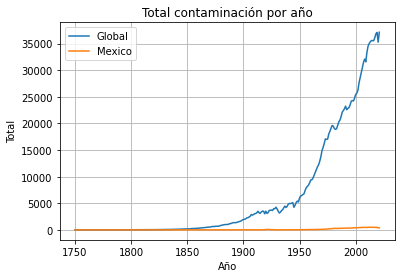

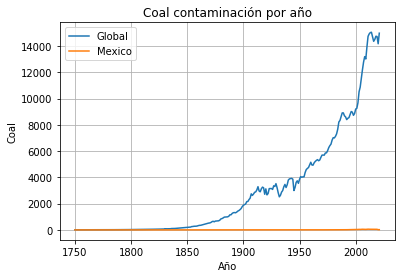

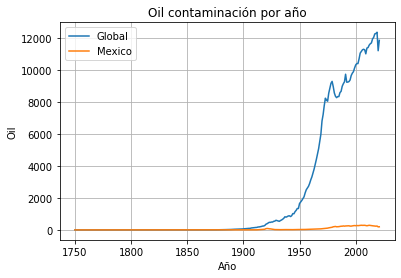

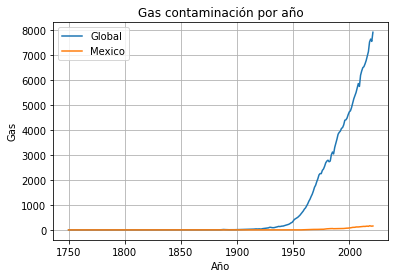

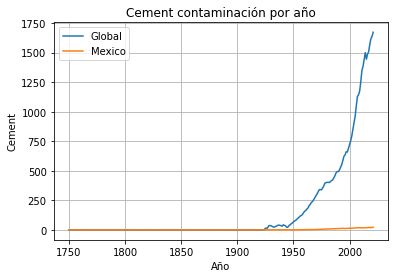

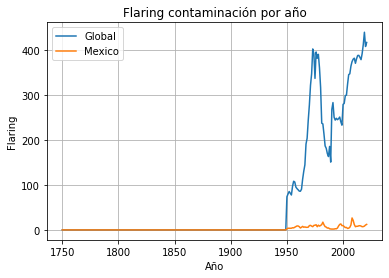

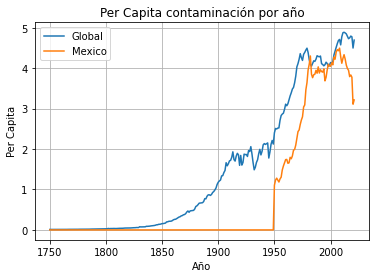

In [26]:
for index, column in enumerate(col):
    fig, ax = plt.subplots()
    df_global.plot(x = 'Year', y = column, ax = ax, label = 'Global', title = column + ' contaminación por año', grid = True, ylabel = column, xlabel = 'Año')
    df_me.plot(x = 'Year', y = column, ax = ax, label = 'Mexico', title = column + ' contaminación por año', grid = True, ylabel = column, xlabel = 'Año')
    

Extraer datos de los países pertenecientes al G20 y graficar las columnas del punto anterior.

Cuales son los 3 países que más contaminan en cada uno de los casos?

Considerando solo la emisión de los paises del G20, con que porcentaje contribuye México al Total y Per Capita?

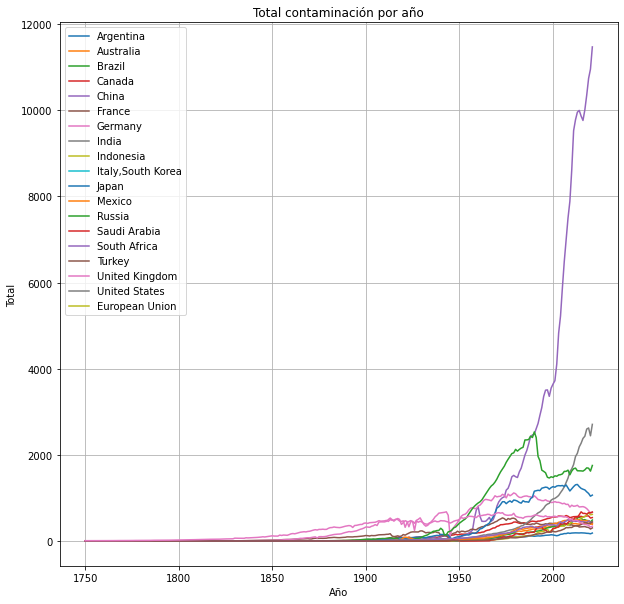

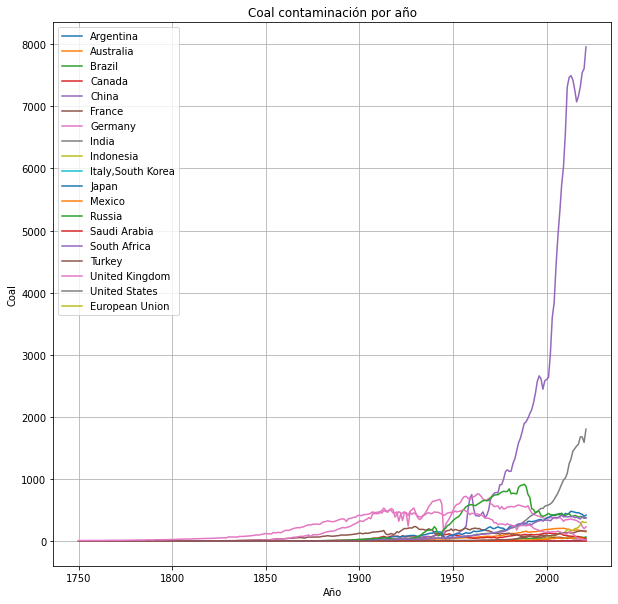

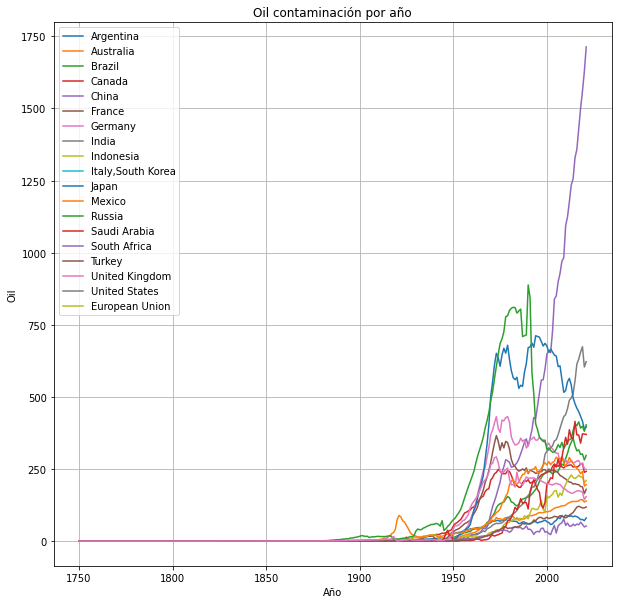

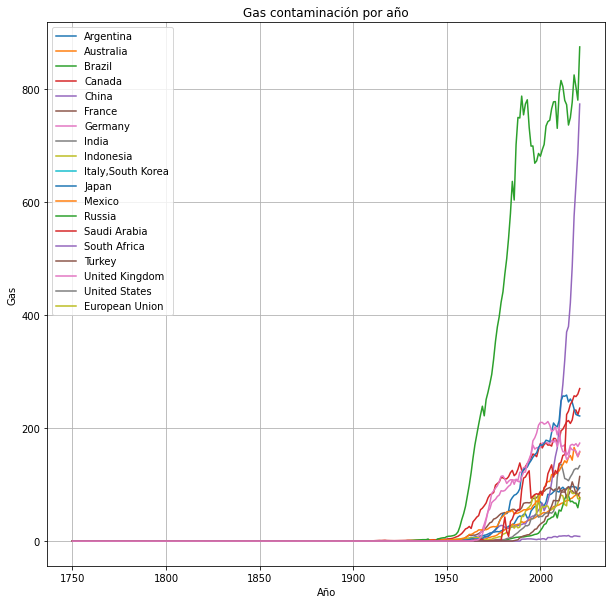

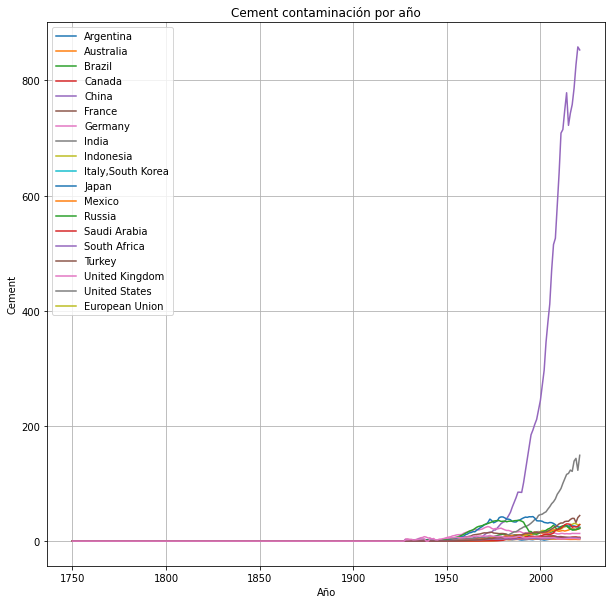

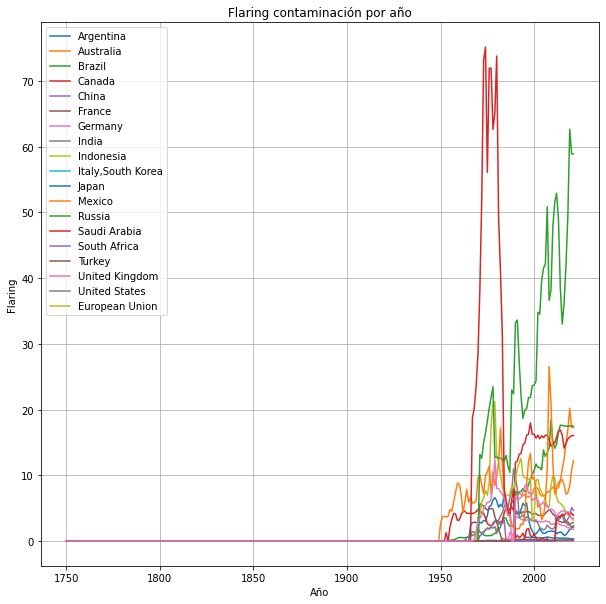

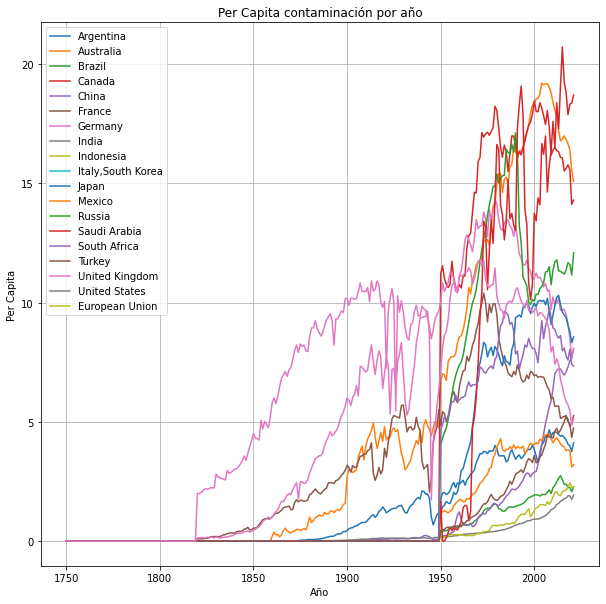

In [27]:
lista_g20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy,' 'South Korea', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States', 'European Union']
df_g20 = {}
for country in lista_g20:
   df_g20.update({country : df[df['Country'] == country]})

col = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']

#Y se cicla sobre cada columna para generar la gráfica.
for index, column in enumerate(col):
    fig, ax = plt.subplots(figsize = (10,10))
    for country in lista_g20:
        df_g20[country].plot(x = 'Year', y = column, ax = ax, label = country, title = column + ' contaminación por año', grid = True, ylabel = column, xlabel = 'Año')

In [35]:
g20_list = list(df_g20.values())
g20_df = pd.concat(g20_list, axis = 0)
g20_df = g20_df.reset_index()
g20_df = g20_df.drop(labels = ['index', 'Year', 'Other'], axis = 1)

total_contaminacion_df = g20_df.groupby('Country').sum()
columns_to_analyse = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']
top_countries = {}
for column in columns_to_analyse:
    top_countries.update({column : total_contamination_df.reset_index().nlargest(3, column)['Country'].tolist()})
print("Los 3 países más contaminantes por cada categoría son:" , top_countries )


columnas = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']
comparativo_me= {}
for column in columnas:
    mexico_sum = total_contaminacion_df.loc['Mexico', column]
    global_sum = total_contaminacion_df[column].sum()
    mexico_sum_porcentage = mexico_sum / global_sum * 100
    comparativo_me.update({column : mexico_sum_porcentage})
    print("El valor total de México representa el " , comparativo_me[column], "% del valor total de la columna" , column,  "en el DataFrame")


Los 3 países más contaminantes por cada categoría son: {'Total': ['China', 'Russia', 'Germany'], 'Coal': ['China', 'Germany', 'United Kingdom'], 'Oil': ['China', 'Russia', 'Japan'], 'Gas': ['Russia', 'Canada', 'United Kingdom'], 'Cement': ['China', 'India', 'Japan'], 'Flaring': ['Russia', 'Saudi Arabia', 'Canada'], 'Per Capita': ['United Kingdom', 'Germany', 'Australia']}
El valor total de México representa el  2.3799261570660595 % del valor total de la columna Total en el DataFrame
El valor total de México representa el  0.31297264536787217 % del valor total de la columna Coal en el DataFrame
El valor total de México representa el  5.637918150760537 % del valor total de la columna Oil en el DataFrame
El valor total de México representa el  4.426936419775703 % del valor total de la columna Gas en el DataFrame
El valor total de México representa el  2.4077141011717456 % del valor total de la columna Cement en el DataFrame
El valor total de México representa el  9.496779822325285 % del v